## Active Users and Churn

A look at Active Users and Churn from unknown Company A between January 1st 2017 and June 1st 2017.


### Code

In [16]:
import os
import pandas_redshift as pr
import seaborn as sns
import matplotlib.pyplot as plt

from utilities.db_connection import db_pandas_query

In [17]:
q_daily_active = """
    SELECT * FROM jmarsan.snapshot_active_users_daily WHERE snapshot_date >= '2017-01-29' AND snapshot_date <= '2017-06-01'
    """
daily_active = db_pandas_query(q_daily_active)

In [18]:
q_monthly_active = """
    SELECT * FROM jmarsan.snapshot_active_users_monthly WHERE month >= '2017-02-01' AND month <= '2017-06-01'
    """
monthly_active = db_pandas_query(q_monthly_active)


In [19]:
q_daily_churn = """
    SELECT * FROM jmarsan.snapshot_user_churn_rate_daily WHERE snapshot_date >= '2017-01-29' AND snapshot_date <= '2017-06-01'
    """
daily_churn = db_pandas_query(q_daily_churn)

In [20]:
q_monthly_churn = """
    SELECT * FROM jmarsan.snapshot_user_churn_rate_monthly WHERE month >= '2017-02-01' AND month <= '2017-06-01'
    """
monthly_churn = db_pandas_query(q_monthly_churn)

In [21]:
daily_active.sort_values(by=['snapshot_date'], inplace=True)
monthly_active.sort_values(by=['month'], inplace=True)
daily_churn.sort_values(by=['snapshot_date'], inplace=True)
monthly_churn.sort_values(by=['month'], inplace=True)

### Graphics

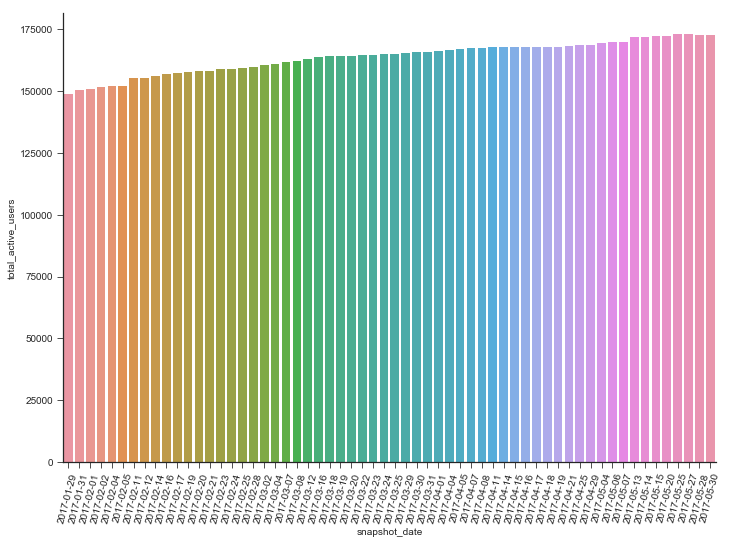

In [22]:
# plot
daily_active_subset = daily_active.sample(n=60).sort_values(by=['snapshot_date'])
fig, ax = plt.subplots()
plt.xticks(rotation=75)
fig.set_size_inches(11.7, 8.27)
ax = sns.barplot(x="snapshot_date", y="total_active_users", data=daily_active_subset)
sns.despine()

Looking from February onwards, daily active users appear to increase at a steady rate.

Note: The first four weeks of January were truncated because we do not have December data. Sampling was also used to make the graph easier to read, with the caveat that spacing between dates is not exactly proportional to time.

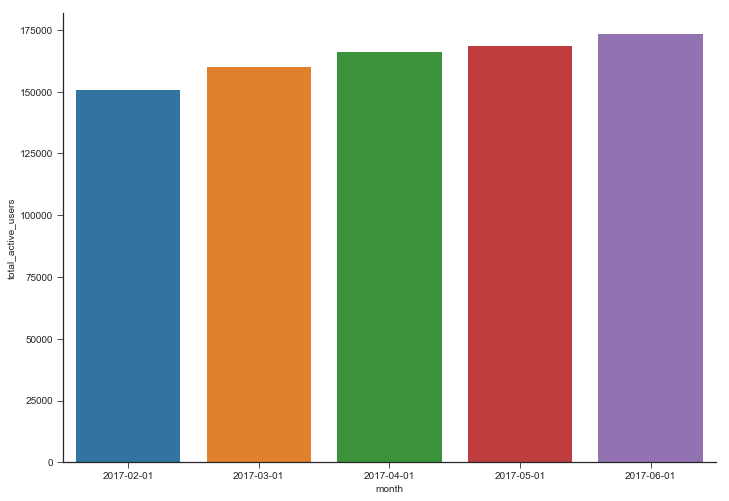

In [23]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.barplot(x="month", y="total_active_users", data=monthly_active)
sns.despine()

Similar to the daily breakdown, Active Users are steadily increasing.

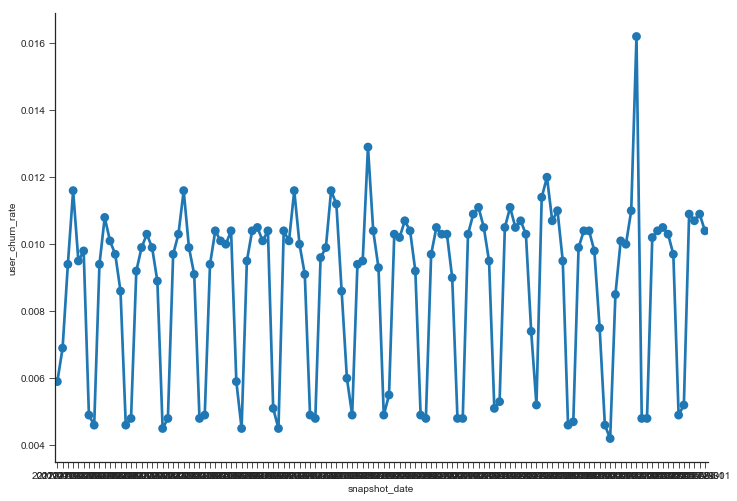

In [24]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.pointplot(x="snapshot_date", y="user_churn_rate", data=daily_churn)
sns.despine()

Daily churn rate appears to hover around 1%. 

The dips are because of weekends. This is likely because fewer people are active on the weekends (vs weekdays), and our churn definition is tied to active usage.  

The reason for the extremely high churn rate in May should be looked into. (e.g. Was a promotion driving many users that day?)

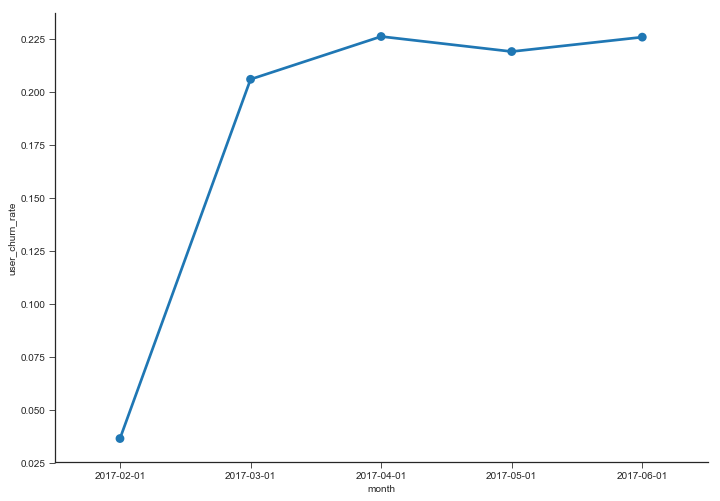

In [25]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.pointplot(x="month", y="user_churn_rate", data=monthly_churn)
sns.despine()

Monthly churn appears to be hover around 21%. It appears to be increasing, a longer timeline would be necessary to get a better idea of the trend.

Note: Churn in February is much lower since the data set starts in 2017-01-01, meaning users only had a few days to churn (compared to a full month).

### Analysis Notes

As the active user base increases, it's important to focus on decreasing churn because this has a direct impact on value of your customer base (LTV).

To better determine the relationship between churn and the marketing funnel or web app usage, it's a good idea to create user segments based on:
* Marketing Channels
* Web App Usage
* User / Compage Types
* ...

Segments with **lower churn** are a good indication of "fit", and that the marketing team should focus on trying to convert more of these types of customers. Segments with **higher churn** need to be investigated to see whether a strategy can be created to decrease their churn, or a decision be made to simply not spend time or money targeting these segment(s).

***

### Definitions

* **Active User**: A user is considered active on any day where they have at least one task executed in the prior 28 days.
* **Churned User**: A user is considered to be churn the 28 days following their last being considered active.
* **Inactive User**: A user is considered to be be inactive forever after their last churn period, until they become active again. 
* **Churn Rate**: ((total active users from previous time period) - (total active users from current time period that are churned or inactive))/(total active users from previous time period)
